In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
### ----- Load the full dataset from HDF5 files ----- ###

training_data = h5py.File('/hdd/mlaapde/decimated/training_data_full_decimate2.hdf5', 'r')
dataset_names = list(training_data.keys())
print(dataset_names)

train_waves = training_data['waves'][0:5000]
train_mags = training_data['magnitude'][0:5000]
train_phase_id = training_data['phase_id'][0:5000]

training_data.close()

['magnitude', 'magnitude_type', 'phase_id', 'snr_db', 'waves']


In [3]:
train_waves_t = train_waves.transpose(0,2,1)
print(train_waves_t.shape)

(5000, 2400, 3)


In [5]:
train_waves = train_waves_t
# train_mags = train_mags
dropE_rate = 0.05
dropN_rate = 1
dropZ_rate = 0.05
lengthpts = train_waves_t.shape[1]
trim_sec = 60
sr = 20
window_len = trim_sec * 2
#train_split = train_split
#lentraindata = int(shift_train_waves_t.shape[0])
#middle = int(shift_train_waves_t.shape[1] / 2)

wvf_idx = np.random.choice(np.arange(0,len(train_mags),1))
wvf_idx = 3115
print('Waveform index: ' + str(wvf_idx))
#print(train_labels['phase_id'][wvf_idx])
times = np.arange(0, window_len, 1/sr)

def plot_features(axis):
    axis.legend(loc = 'upper left', fontsize = 14)
    axis.set_xlim(0,shift_len)
    axis.set_ylim(-1.2,1.2)
    axis.axvline(shift_len/2, color = 'black', linestyle = '--', alpha = 0.7)
    axis.tick_params(axis = 'x', bottom = False, labelbottom = False)

### ----- FIGURE 2 ----- ###    
    
f, ((a0, a1), (a2, a3), (a4, a5), (a6, a7), (a8, a9), (a10, a11), (a12, a13), (a14, a15), (a16, a17), (a18, a19), (a20, a21)) = plt.subplots(nrows = 11, ncols = 2, gridspec_kw={'height_ratios': [1, 1, 1, 0.75, 1, 1, 1, 0.75, 1, 1, 1]}, figsize = (16,18), dpi=300, facecolor = 'white')

### Original waveforms ###

a0.set_title('Original waveforms', fontsize = 18)
#a0.plot(times, train_waves_t[wvf_idx,:,0], color = '#001628', label = 'E') 
#a0.plot(times, train_waves_t[wvf_idx,:,0], color = '#37392E', label = 'E') 
#a0.plot(times, train_waves_t[wvf_idx,:,0], color = '#001628', label = 'E') # Kraken
a0.plot(times, train_waves_t[wvf_idx,:,0], color = '#001528', label = 'E')
a0.legend(loc = 'upper left', fontsize = 14)
a0.set_xlim(0,window_len)
a0.set_ylim(-1.2,1.2)
a0.axvline(window_len/2, color = 'black', linestyle = '--', alpha = 0.7)
a0.tick_params(axis = 'x', bottom = False, labelbottom = False)
a0.tick_params(axis = 'y', labelsize = 14)

a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#2DADB4', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#31BCC4', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#3BAECE', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#45B3D1', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#449DD1', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#192BC2', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#19647E', label = 'N')
#a2.plot(times, train_waves_t[wvf_idx,:,1], color = '#68A2B9', label = 'N') # Kraken
a2.set_ylabel('Stream-normalized amplitude', fontsize = 16)
a2.legend(loc = 'upper left', fontsize = 14)
a2.set_xlim(0,window_len)
a2.set_ylim(-1.2,1.2)
a2.axvline(window_len/2, color = 'black', linestyle = '--', alpha = 0.7)
a2.tick_params(axis = 'x', bottom = False, labelbottom = False)
a2.tick_params(axis = 'y', labelsize = 14)

a4.plot(times, train_waves_t[wvf_idx,:,2], color = '#E9072D', label = 'Z')
#a4.plot(times, train_waves_t[wvf_idx,:,2], color = '#449DD1', label = 'Z')
#a4.plot(times, train_waves_t[wvf_idx,:,2], color = '#28AFB0', label = 'Z')
#a4.plot(times, train_waves_t[wvf_idx,:,2], color = '#E9072B', label = 'Z') # Kraken
a4.set_xlabel('Time (s)', fontsize = 16)
a4.legend(loc = 'upper left', fontsize = 14)
a4.set_xlim(0,window_len)
a4.set_ylim(-1.2,1.2)
a4.axvline(window_len/2, color = 'black', linestyle = '--', alpha = 0.7)
a4.tick_params(axis = 'x', bottom = True, labelbottom = True, labelsize = 14)
a4.tick_params(axis = 'y', labelsize = 14)

### Trimming to window length ###

cut_len = 14
middle = int(train_waves_t.shape[1] / 2)
X = train_waves_t[wvf_idx, int(middle - (cut_len/2)*sr) : int(middle + (cut_len/2)*sr), 0:3]
X = X / np.max(np.abs(X))
cut_lengthpts = X.shape[0]

cut_times = np.arange(0, cut_len, 1/sr)

a1.set_title('Trimming to desired window length', fontsize = 18)
a1.plot(cut_times, X[:,0], color = '#001528', label = 'E')
a1.legend(loc = 'upper left', fontsize = 14)
a1.set_xlim(0,cut_len)
a1.set_ylim(-1.2,1.2)
a1.axvline(cut_len/2, color = 'black', linestyle = '--', alpha = 0.7)
a1.tick_params(axis = 'x', bottom = False, labelbottom = False)
a1.tick_params(axis = 'y', labelsize = 14)

a3.plot(cut_times, X[:,1], color = '#2DADB4', label = 'N')
a3.set_ylabel('Stream-normalized amplitude', fontsize = 16)
a3.legend(loc = 'upper left', fontsize = 14)
a3.set_xlim(0,cut_len)
a3.set_ylim(-1.2,1.2)
a3.axvline(cut_len/2, color = 'black', linestyle = '--', alpha = 0.7)
a3.tick_params(axis = 'x', bottom = False, labelbottom = False)
a3.tick_params(axis = 'y', labelsize = 14)

a5.plot(cut_times, X[:,2], color = '#E9072D', label = 'Z')
a5.set_xlabel('Time (s)', fontsize = 16)
a5.legend(loc = 'upper left', fontsize = 14)
a5.set_xlim(0,cut_len)
a5.set_ylim(-1.2,1.2)
a5.axvline(cut_len/2, color = 'black', linestyle = '--', alpha = 0.7)
a5.tick_params(axis = 'x', bottom = True, labelbottom = True, labelsize = 14)
a5.tick_params(axis = 'y', labelsize = 14)

### Shifting up to 3 seconds ###

desired_shift = 3 # seconds
shift = desired_shift * 2 # to shift properly
time_offset = np.random.uniform(low = 0, high = shift) # seconds

shift_len = cut_len - shift
samps_offset = int(time_offset*sr)
start = samps_offset
end = int(start + shift_len*sr)
X = X[start:end, 0:3]
X = X / np.max(np.abs(X))
shift_lengthpts = X.shape[0]

shift_times = np.arange(0, shift_len, 1/sr)

a8.set_title('Randomly shifted', fontsize = 18)
a8.plot(shift_times, X[:,0], color = '#001528', label = 'E')
plot_features(a8)
a8.tick_params(axis = 'y', labelsize = 14)

a10.plot(shift_times, X[:,1], color = '#2DADB4', label = 'N')
a10.set_ylabel('Stream-normalized amplitude', fontsize = 16)
plot_features(a10)
a10.tick_params(axis = 'y', labelsize = 14)

a12.plot(shift_times, X[:,2], color = '#E9072D', label = 'Z')
a12.set_xlabel('Time (s)', fontsize = 16)
plot_features(a12)
a12.tick_params(axis = 'x', bottom = True, labelbottom = True, labelsize = 14)
a12.tick_params(axis = 'y', labelsize = 14)

### Extra noise ###

noiseE = X[:,0] + np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts)
noiseN = X[:,1] + np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts)
noiseZ = X[:,2] + np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts)

a9.set_title('Extra noise', fontsize = 18)
a9.plot(shift_times, noiseE, color = '#001528', label = 'E') 
plot_features(a9)
a9.tick_params(axis = 'y', labelsize = 14)

a11.plot(shift_times, noiseN, color = '#2DADB4', label = 'N')
a11.set_ylabel('Stream-normalized amplitude', fontsize = 16)
plot_features(a11)
a11.tick_params(axis = 'y', labelsize = 14)

a13.plot(shift_times, noiseZ, color = '#E9072D', label = 'Z')
a13.set_xlabel('Time (s)', fontsize = 16)
plot_features(a13)
a13.tick_params(axis = 'x', bottom = True, labelbottom = True, labelsize = 14)
a13.tick_params(axis = 'y', labelsize = 14)

### Flip channels ###
    
flip = X[:,0].copy()
newE = X[:,1]
newN = flip

a16.set_title('Flip horizontal components', fontsize = 18)
a16.plot(shift_times, newE, color = '#001528', label = 'E') 
plot_features(a16)
a16.tick_params(axis = 'y', labelsize = 14)

a18.plot(shift_times, newN, color = '#2DADB4', label = 'N')
a18.set_ylabel('Stream-normalized amplitude', fontsize = 16)
plot_features(a18)
a18.tick_params(axis = 'y', labelsize = 14)

a20.plot(shift_times, X[:,2], color = '#E9072D', label = 'Z')
a20.set_xlabel('Time (s)', fontsize = 16)
plot_features(a20)
a20.tick_params(axis = 'x', bottom = True, labelbottom = True, labelsize = 14)
a20.tick_params(axis = 'y', labelsize = 14)

### Drop channels ###

dropE = X[:,0].copy()
dropN = X[:,1].copy()
dropZ = X[:,2].copy()

if(np.random.random() < dropE_rate):
    dropE = np.zeros(X.shape[0])
    drop = 'E'

if(np.random.random() < dropN_rate):
    dropN = np.zeros(X.shape[0])
    drop = 'N'

if(np.random.random() < dropZ_rate):
    dropZ = np.zeros(X.shape[0])
    drop = 'Z'

a17.set_title('Drop channel', fontsize = 18)
a17.plot(shift_times, dropE, color = '#001528', label = 'E') 
plot_features(a17)
a17.tick_params(axis = 'y', labelsize = 14)

a19.plot(shift_times, dropN, color = '#2DADB4', label = 'N')
a19.set_ylabel('Stream-normalized amplitude', fontsize = 16)
plot_features(a19)
a19.tick_params(axis = 'y', labelsize = 14)

a21.plot(shift_times, dropZ, color = '#E9072D', label = 'Z')
a21.set_xlabel('Time (s)', fontsize = 16)
plot_features(a21)
a21.tick_params(axis = 'x', bottom = True, labelbottom = True, labelsize = 14)
a21.tick_params(axis = 'y', labelsize = 14)

### Invisible spacing plots ###

a6.set_visible(False)
a7.set_visible(False)
a14.set_visible(False)
a15.set_visible(False)

plt.subplots_adjust(hspace = 0)

### Letters ###

a0.text(x = -16, y = 1.4, s = '(a)', fontsize = 22)
a1.text(x = -1.9, y = 1.4, s = '(b)', fontsize = 22)
a8.text(x = -1, y = 1.4, s = '(c)', fontsize = 22)
a9.text(x = -1, y = 1.4, s = '(d)', fontsize = 22)
a16.text(x = -1, y = 1.4, s = '(e)', fontsize = 22)
a17.text(x = -1, y = 1.4, s = '(f)', fontsize = 22)

### Show or save ###

plt.show();
# plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/Fig2_sixpanel_augexamps.png', format = 'PNG')
# plt.close();

# 606, 4827, 2397, 3115 (best)

Waveform index: 3115


Waveform index: 3115
(280, 3)
(160, 3)


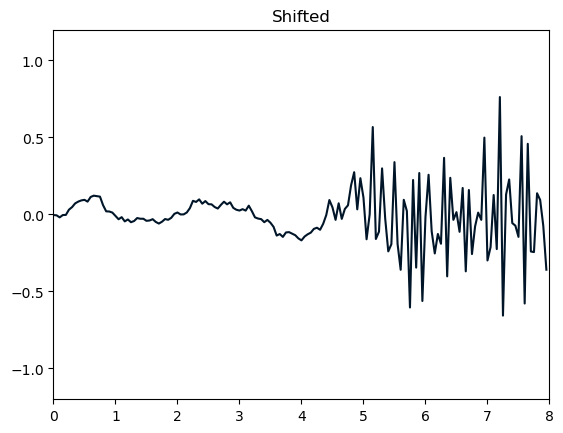

(160, 3)


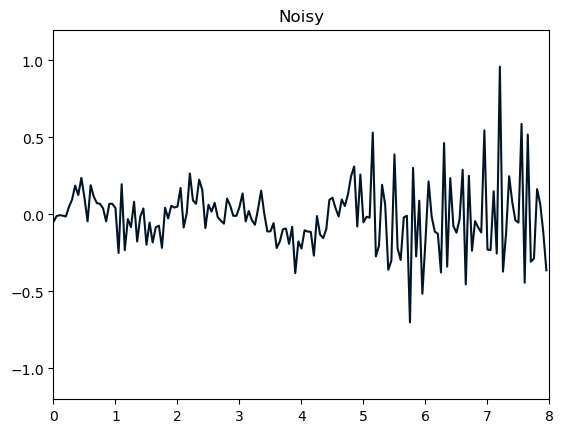

In [15]:
train_waves = train_waves_t
# train_mags = train_mags
dropE_rate = 0.05
dropN_rate = 1
dropZ_rate = 0.05
lengthpts = train_waves_t.shape[1]
trim_sec = 60
sr = 20
window_len = trim_sec * 2
#train_split = train_split
#lentraindata = int(shift_train_waves_t.shape[0])
#middle = int(shift_train_waves_t.shape[1] / 2)

wvf_idx = np.random.choice(np.arange(0,len(train_mags),1))
wvf_idx = 3115
print('Waveform index: ' + str(wvf_idx))
#print(train_labels['phase_id'][wvf_idx])
times = np.arange(0, window_len, 1/sr)

### Original waveforms ###

# plt.plot(times, train_waves_t[wvf_idx,:,0], color = '#001528', label = 'E')
# plt.title('Original waveforms')
# plt.xlim(0,window_len)
# plt.ylim(-1.2,1.2)
# plt.show()

### Trimming to window length ###

cut_len = 14
middle = int(train_waves_t.shape[1] / 2)
X = train_waves_t[wvf_idx, int(middle - (cut_len/2)*sr) : int(middle + (cut_len/2)*sr), 0:3]
X = X / np.max(np.abs(X))
cut_lengthpts = X.shape[0]
print(X.shape)

cut_times = np.arange(0, cut_len, 1/sr)

# plt.plot(cut_times, X[:,0], color = '#001528', label = 'E')
# plt.title('Trimmed')
# plt.xlim(0,cut_len)
# plt.ylim(-1.2,1.2)
# plt.show()

### Shifting up to 3 seconds ###

desired_shift = 3 # seconds
shift = desired_shift * 2 # to shift properly
time_offset = np.random.uniform(low = 0, high = shift) # seconds

shift_len = cut_len - shift
samps_offset = int(time_offset*sr)
start = samps_offset
end = int(start + shift_len*sr)
X = X[start:end, 0:3]
X = X / np.max(np.abs(X))
shift_lengthpts = X.shape[0]
print(X.shape)

shift_times = np.arange(0, shift_len, 1/sr)

plt.plot(shift_times, X[:,0], color = '#001528', label = 'E')
plt.title('Shifted')
plt.xlim(0,shift_len)
plt.ylim(-1.2,1.2)
plt.show()

### Extra noise ###

noiseE = X[:,0] + np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts)
noiseN = X[:,1] + np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts)
noiseZ = X[:,2] + np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts)
print(X.shape)

plt.plot(shift_times, noiseE, color = '#001528', label = 'E') 
plt.title('Noisy')
plt.xlim(0,shift_len)
plt.ylim(-1.2,1.2)
plt.show()

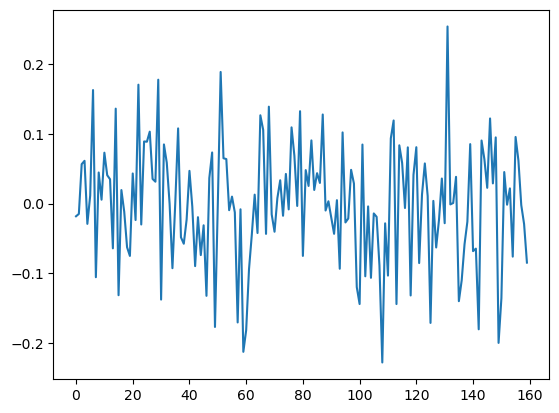

In [14]:
plt.plot(np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts))
# centered at 0
# scale is the standard deviation (width) of the distribution: using uniform draws samples from between 0.01 and 0.15
# last bit is the length of the waveform

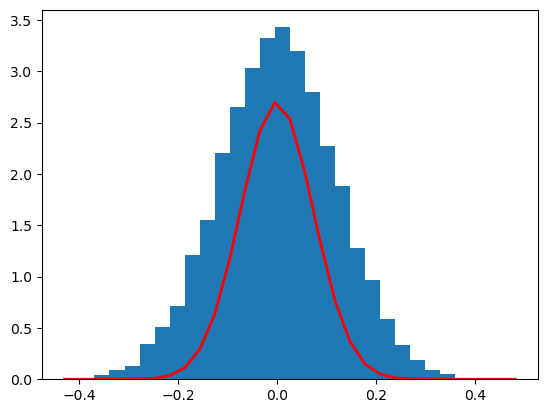

In [21]:
s = np.random.normal(0, np.random.uniform(0.01, 0.15), shift_lengthpts*100)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(np.random.uniform(0.01, 0.15) * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * np.random.uniform(0.01, 0.15)**2) ),
         linewidth=2, color='r')
plt.show()